# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from scipy.stats import iqr
sns.set_theme(style='dark')

In [2]:
# Function to make histogram and boxplot of a feature
def plot_variable(df,variable):
    plt.figure(figsize=(15,10))
    
    # creating a histogram
    plt.subplot(121)
    plt.hist(df[variable])
    
    # creating a boxplot
    plt.subplot(122)
    plt.boxplot(df[variable])
    plt.show()

# ==== Employee Dataset ====

In [3]:
df = pd.read_csv("employees.csv", na_values=' - ')    # target - salary, feature - JOB_ID
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-JUN-07,SH_CLERK,2600,NaN,124.0,50
1,199,Douglas,Grant,DGRANT,650.507.9844,13-JAN-08,SH_CLERK,2600,NaN,124.0,50
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,17-SEP-03,AD_ASST,4400,NaN,101.0,10
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,17-FEB-04,MK_MAN,13000,NaN,100.0,20
4,202,Pat,Fay,PFAY,603.123.6666,17-AUG-05,MK_REP,6000,NaN,201.0,20


In [4]:
# Checking for null values
df.isnull().sum()

EMPLOYEE_ID        0
FIRST_NAME         0
LAST_NAME          0
EMAIL              0
PHONE_NUMBER       0
HIRE_DATE          0
JOB_ID             0
SALARY             0
COMMISSION_PCT    50
MANAGER_ID         1
DEPARTMENT_ID      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EMPLOYEE_ID     50 non-null     int64  
 1   FIRST_NAME      50 non-null     object 
 2   LAST_NAME       50 non-null     object 
 3   EMAIL           50 non-null     object 
 4   PHONE_NUMBER    50 non-null     object 
 5   HIRE_DATE       50 non-null     object 
 6   JOB_ID          50 non-null     object 
 7   SALARY          50 non-null     int64  
 8   COMMISSION_PCT  0 non-null      float64
 9   MANAGER_ID      49 non-null     float64
 10  DEPARTMENT_ID   50 non-null     int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.4+ KB


In [6]:
df['JOB_ID'].value_counts()

ST_CLERK      16
ST_MAN         5
PU_CLERK       5
FI_ACCOUNT     5
IT_PROG        5
AD_VP          2
SH_CLERK       2
AC_ACCOUNT     1
AD_ASST        1
AC_MGR         1
PR_REP         1
FI_MGR         1
HR_REP         1
PU_MAN         1
MK_REP         1
MK_MAN         1
AD_PRES        1
Name: JOB_ID, dtype: int64

### Encoding JOB_ID feature

In [7]:
df['JOB_ID'].replace({'AC_ACCOUNT': 0, 'AC_MGR': 1, 'AD_ASST': 2, 'AD_PRES': 3, 'AD_VP': 4, 'FI_ACCOUNT': 5, 
                      'FI_MGR': 6, 'HR_REP': 7, 'IT_PROG': 8, 'MK_MAN': 9, 'MK_REP': 10, 'PR_REP': 11, 
                      'PU_CLERK': 12, 'PU_MAN': 13, 'SH_CLERK': 14, 
                      'ST_CLERK': 15, 'ST_MAN': 16}, inplace=True)

In [8]:
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-JUN-07,14,2600,NaN,124.0,50
1,199,Douglas,Grant,DGRANT,650.507.9844,13-JAN-08,14,2600,NaN,124.0,50
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,17-SEP-03,2,4400,NaN,101.0,10
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,17-FEB-04,9,13000,NaN,100.0,20
4,202,Pat,Fay,PFAY,603.123.6666,17-AUG-05,10,6000,NaN,201.0,20


In [9]:
# Picking important features
df = df[['JOB_ID', 'SALARY']]

### Checking for outliers

<AxesSubplot:>

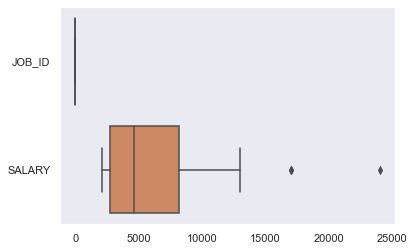

In [10]:
sns.boxplot(data=df, orient='h')

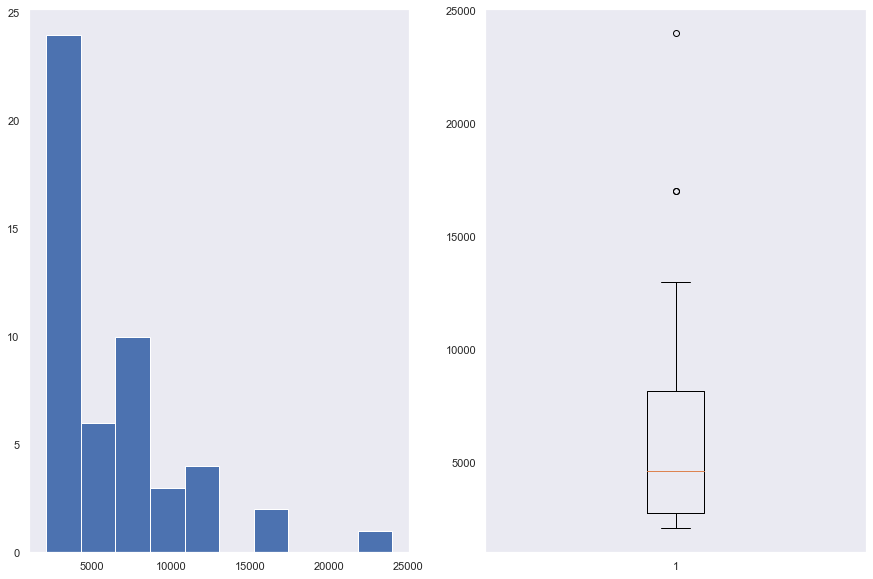

In [11]:
plot_variable(df, 'SALARY')

In [12]:
# Dropping null values
df.dropna(inplace=True)

### Considering features and target

In [13]:
features = df[['JOB_ID']]
target = df['SALARY']

### Splitting data into training and testing sets

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.1, random_state=42)

### Using Linear Regression to train the model

In [15]:
linReg = LinearRegression()
linReg.fit(X_train, Y_train)
linReg.score(X_test, Y_test)

0.36183081909215953

# ===== House Price Dataset =====

In [16]:
df1 = pd.read_csv("house_prices1.csv")   # target - Sale Price
df2 = pd.read_csv("house_prices2.csv") 

In [17]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [18]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Data Exploration

In [19]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [20]:
# Counting the values
print(df1['MSZoning'].value_counts(), end='\n\n')
print(df1['BldgType'].value_counts(), end='\n\n')
print(df1['HouseStyle'].value_counts(), end='\n\n')
print(df1['OverallQual'].value_counts(), end='\n\n')
print(df1['OverallCond'].value_counts(), end='\n\n')
print(df1['SaleType'].value_counts(), end='\n\n')
print(df1['SaleCondition'].value_counts(), end='\n\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64



In [21]:
# Encoding categorical features
df1['MSZoning'].replace({'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4}, inplace=True)

df1['BldgType'].replace({'1Fam': 0, 'TwnhsE': 1, 'Duplex': 2, 'Twnhs': 3, '2fmCon': 4}, inplace=True)

df1['HouseStyle'].replace({'1Story': 0, '2Story': 1, '1.5Fin': 2, 'SLvl': 3, 'SFoyer': 4, 
                           '1.5Unf': 5, '2.5Unf': 6, '2.5Fin': 7}, inplace=True)

df1['SaleType'].replace({'WD': 0, 'New': 1, 'COD': 2, 'ConLD': 3, 'ConLI': 4, 'ConLw': 5,
                        'CWD': 6, 'Oth': 7, 'Con': 8}, inplace=True)

df1['SaleCondition'].replace({'Normal': 0, 'Partial': 1, 'Abnorml': 2, 'Family': 3, 'Alloca': 4,
                             'AdjLand': 5}, inplace=True)

In [22]:
df1.corrwith(df1['SalePrice'])

Id              -0.021917
MSSubClass      -0.084284
MSZoning        -0.183642
LotFrontage      0.351799
LotArea          0.263843
BldgType        -0.173900
HouseStyle      -0.087456
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold      

In [23]:
# Picking up the features with highest correlation value with the target - SalePrice
sorted(df1.corrwith(df1['SalePrice']), reverse=True)

[0.9999999999999998,
 0.7909816005838052,
 0.7086244776126522,
 0.6404091972583517,
 0.6234314389183618,
 0.6135805515591952,
 0.6058521846919145,
 0.5606637627484439,
 0.5337231555820281,
 0.5228973328794971,
 0.5071009671113864,
 0.48636167748786074,
 0.4774930470957165,
 0.466928836751527,
 0.3864198062421531,
 0.3517990965706781,
 0.32441344456813004,
 0.3193338028320681,
 0.31585622711605554,
 0.28410767559478334,
 0.2638433538714057,
 0.22712223313149368,
 0.21447910554696895,
 0.16821315430073983,
 0.11144657114291114,
 0.09240354949187314,
 0.08111472662409544,
 0.04643224522381938,
 0.04458366533574846,
 0.0045906188202032875,
 -0.011378121450215117,
 -0.016844154297359006,
 -0.02118957964030324,
 -0.021916719443431112,
 -0.02560613000067954,
 -0.0289225851687304,
 -0.07785589404867806,
 -0.08428413512659524,
 -0.08745621791796111,
 -0.1285779579259565,
 -0.13590737084214155,
 -0.17390036137456596,
 -0.18364160535590895]

In [24]:
# Considering important columns
df1 = df1[['MSZoning', 'BldgType', 'HouseStyle', 'SaleType', 'SaleCondition', 
           'OverallCond', 'OverallQual', 'SalePrice']]
df1

,MSZoning,BldgType,HouseStyle,SaleType,SaleCondition,OverallCond,OverallQual,SalePrice
0,0,0,1,0,0,5,7,208500
1,0,0,0,0,0,8,6,181500
2,0,0,1,0,0,5,7,223500
3,0,0,1,0,2,5,7,140000
4,0,0,1,0,0,5,8,250000
...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,5,6,175000
1456,0,0,0,0,0,6,6,210000
1457,0,0,1,0,0,9,7,266500
1458,0,0,0,0,0,6,5,142125


In [25]:
# Checking for null values
df1.isnull().sum()

MSZoning         0
BldgType         0
HouseStyle       0
SaleType         0
SaleCondition    0
OverallCond      0
OverallQual      0
SalePrice        0
dtype: int64

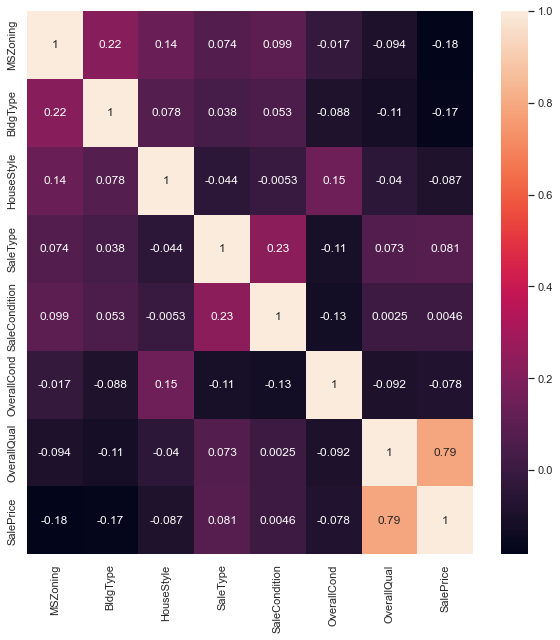

In [26]:
# Using heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True)
plt.show()

### Checking for outliers

<AxesSubplot:>

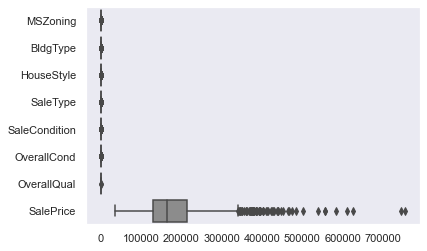

In [27]:
sns.boxplot(data=df1, orient='h')

### Considering features and target

In [28]:
features = df1.iloc[:, :-1]
target = df1.iloc[:, -1]

### Splitting data into training and testing sets

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=150)

### Applying Linear Regression to predict house sale prices

In [30]:
linReg = LinearRegression()
linReg.fit(X_train, Y_train)
linReg.score(X_test, Y_test)

0.6343659590784689

### Applying the same encoding scheme for HousePrice2 dataset

In [31]:
# Encoding categorical features
df2['MSZoning'].replace({'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4}, inplace=True)

df2['BldgType'].replace({'1Fam': 0, 'TwnhsE': 1, 'Duplex': 2, 'Twnhs': 3, '2fmCon': 4}, inplace=True)

df2['HouseStyle'].replace({'1Story': 0, '2Story': 1, '1.5Fin': 2, 'SLvl': 3, 'SFoyer': 4, 
                           '1.5Unf': 5, '2.5Unf': 6, '2.5Fin': 7}, inplace=True)

df2['SaleType'].replace({'WD': 0, 'New': 1, 'COD': 2, 'ConLD': 3, 'ConLI': 4, 'ConLw': 5,
                        'CWD': 6, 'Oth': 7, 'Con': 8}, inplace=True)

df2['SaleCondition'].replace({'Normal': 0, 'Partial': 1, 'Abnorml': 2, 'Family': 3, 'Alloca': 4,
                             'AdjLand': 5}, inplace=True)

In [32]:
df2 = df2[['MSZoning', 'BldgType', 'HouseStyle', 'SaleType', 'SaleCondition', 
           'OverallCond', 'OverallQual']]
df2

,MSZoning,BldgType,HouseStyle,SaleType,SaleCondition,OverallCond,OverallQual
0,3.0,0,0,0.0,0,6,5
1,0.0,0,0,0.0,0,6,6
2,0.0,0,1,0.0,0,5,5
3,0.0,0,1,0.0,0,6,6
4,0.0,1,0,0.0,0,5,8
...,...,...,...,...,...,...,...
1454,1.0,3,1,0.0,0,7,4
1455,1.0,1,1,0.0,2,5,4
1456,0.0,0,0,0.0,2,7,5
1457,0.0,0,4,0.0,0,5,5


In [33]:
# Checking for null values
df2.isnull().sum()

MSZoning         4
BldgType         0
HouseStyle       0
SaleType         1
SaleCondition    0
OverallCond      0
OverallQual      0
dtype: int64

In [34]:
# Filling the null values
df2['SaleType'].fillna(np.array(df2['SaleType'].mode())[0], inplace=True)
df2['MSZoning'].fillna(np.array(df2['MSZoning'].mode())[0], inplace=True)

C:\Users\hellb\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [35]:
# Making predictions
predictedPrices = linReg.predict(df2)

In [36]:
# Introducing SalePrice column which is missing in this dataset
df2['SalePrice'] = pd.DataFrame(predictedPrices)
df2

C:\Users\hellb\AppData\Local\Temp/ipykernel_8852/2336765707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SalePrice'] = pd.DataFrame(predictedPrices)


,MSZoning,BldgType,HouseStyle,SaleType,SaleCondition,OverallCond,OverallQual,SalePrice
0,3.0,0,0,0.0,0,6,5,106770.581655
1,0.0,0,0,0.0,0,6,6,181941.610462
2,0.0,0,1,0.0,0,5,5,136970.684068
3,0.0,0,1,0.0,0,6,6,180349.872572
4,0.0,1,0,0.0,0,5,8,264689.946936
...,...,...,...,...,...,...,...,...
1454,1.0,3,1,0.0,0,7,4,64380.123999
1455,1.0,1,1,0.0,2,5,4,75930.238243
1456,0.0,0,0,0.0,2,7,5,136449.052396
1457,0.0,0,4,0.0,0,5,5,132195.470396


### Finally, joining housePrice1 and housePrice2 datasets

In [37]:
# Joining the two dataframes --> df1 and df2
houseDataset = pd.concat([df1, df2], axis=0)
houseDataset

,MSZoning,BldgType,HouseStyle,SaleType,SaleCondition,OverallCond,OverallQual,SalePrice
0,0.0,0,1,0.0,0,5,7,208500.000000
1,0.0,0,0,0.0,0,8,6,181500.000000
2,0.0,0,1,0.0,0,5,7,223500.000000
3,0.0,0,1,0.0,2,5,7,140000.000000
4,0.0,0,1,0.0,0,5,8,250000.000000
...,...,...,...,...,...,...,...,...
1454,1.0,3,1,0.0,0,7,4,64380.123999
1455,1.0,1,1,0.0,2,5,4,75930.238243
1456,0.0,0,0,0.0,2,7,5,136449.052396
1457,0.0,0,4,0.0,0,5,5,132195.470396


In [38]:
houseDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       2919 non-null   float64
 1   BldgType       2919 non-null   int64  
 2   HouseStyle     2919 non-null   int64  
 3   SaleType       2919 non-null   float64
 4   SaleCondition  2919 non-null   int64  
 5   OverallCond    2919 non-null   int64  
 6   OverallQual    2919 non-null   int64  
 7   SalePrice      2919 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 205.2 KB


# ==== Titanic Dataset ====

In [39]:
# Reading the file
titanicData = pd.read_csv("titanic.csv")  # target - Survived, features - PClass, Sex, Fare
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data exploration

In [40]:
titanicData.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [41]:
# checking for classes
titanicData['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [42]:
# checking for null values
titanicData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
titanicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

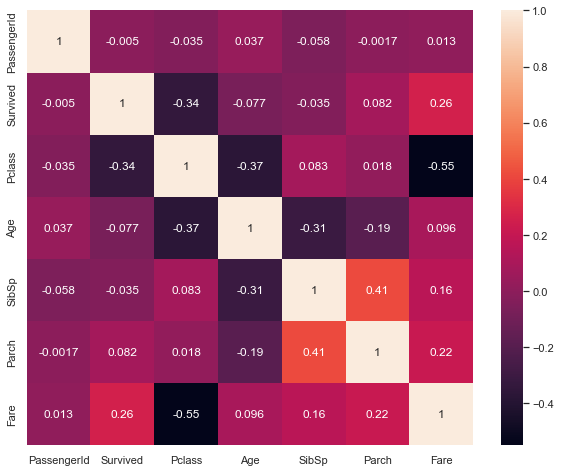

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(titanicData.corr(), annot=True)

In [45]:
# encoding `sex` column in data
titanicData['Sex'].replace({'male': 0, 'female': 1}, inplace=True)

In [46]:
# selecting relevant features
titanicData = titanicData[['Pclass', 'Sex', 'Fare', 'Survived']]
titanicData

,Pclass,Sex,Fare,Survived
0,3,0,7.2500,0
1,1,1,71.2833,1
2,3,1,7.9250,1
3,1,1,53.1000,1
4,3,0,8.0500,0
...,...,...,...,...
886,2,0,13.0000,0
887,1,1,30.0000,1
888,3,1,23.4500,0
889,1,0,30.0000,1


### Checking for outliers

<AxesSubplot:>

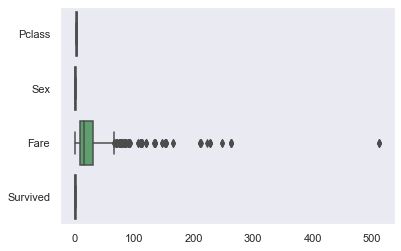

In [47]:
sns.boxplot(data=titanicData, orient='h')

### Removing outliers using IQR method

In [48]:
q1 = titanicData.quantile(0.25)
q3 = titanicData.quantile(0.75)
IQR = titanicData.apply(iqr)

lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR

print("Upper Limit:")
print(upper_limit)
print()
print("Lower Limit:")
print(lower_limit)

Upper Limit:
Pclass       4.5000
Sex          2.5000
Fare        65.6344
Survived     2.5000
dtype: float64

Lower Limit:
Pclass       0.500
Sex         -1.500
Fare       -26.724
Survived    -1.500
dtype: float64


### Trimming the outliers

In [49]:
titanicData = titanicData[(titanicData > lower_limit) & (titanicData < upper_limit)]
titanicData.head()

,Pclass,Sex,Fare,Survived
0,3,0,7.250,0
1,1,1,NaN,1
2,3,1,7.925,1
3,1,1,53.100,1
4,3,0,8.050,0


In [50]:
# After trimming
titanicData.isnull().sum()

Pclass        0
Sex           0
Fare        116
Survived      0
dtype: int64

In [51]:
titanicData['Fare'].fillna(titanicData['Fare'].mean(), inplace=True)

### Outliers decreased

<AxesSubplot:>

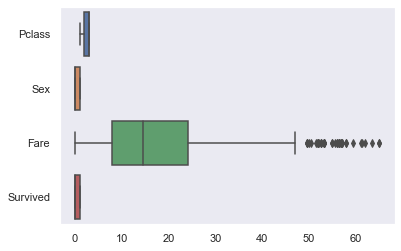

In [52]:
sns.boxplot(data=titanicData, orient='h')

In [53]:
# Fare max value has been changed to 65.0
titanicData.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.00,3.0
Sex,891.0,0.352413,0.477990,0.0,0.0000,0.0000,1.00,1.0
Fare,891.0,17.822091,12.662341,0.0,7.9104,14.4542,24.15,65.0
Survived,891.0,0.383838,0.486592,0.0,0.0000,0.0000,1.00,1.0


### Considering features and target

In [54]:
features = titanicData[['Sex', 'Fare']]
target = titanicData['Survived']

In [55]:
print(features.shape, target.shape)

(891, 2) (891,)


### Splitting data into training and testing sets

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [57]:
logClassifier = LogisticRegression()
logClassifier.fit(X_train, Y_train)
logClassifier.score(X_test, Y_test)

0.7821229050279329

In [58]:
Y_pred = logClassifier.predict(X_test)

### Displaying classification metrics

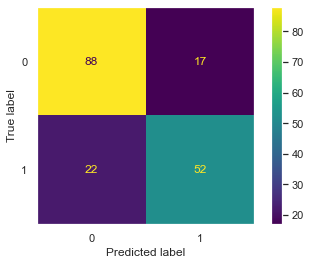

In [59]:
cm = confusion_matrix(Y_test, Y_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

In [60]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

